In [2]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
import math

sb.set_style("white")

wheres_waldo_locations = pd.read_csv("C:/Users/Sudheer/Downloads/wheres-waldo-locations.csv")
wheres_waldo_locations.describe()

,Book,Page,X,Y
count,68.000000,68.000000,68.000000,68.000000
mean,3.514706,6.058824,6.700776,3.875306
std,1.856756,3.411492,3.703276,1.941349
min,1.000000,1.000000,0.625000,0.333333
25%,2.000000,3.000000,3.513889,2.250000
50%,3.000000,6.000000,6.694444,3.927083
75%,5.000000,9.000000,10.062500,5.291667
max,7.000000,12.000000,12.444444,7.708333


''

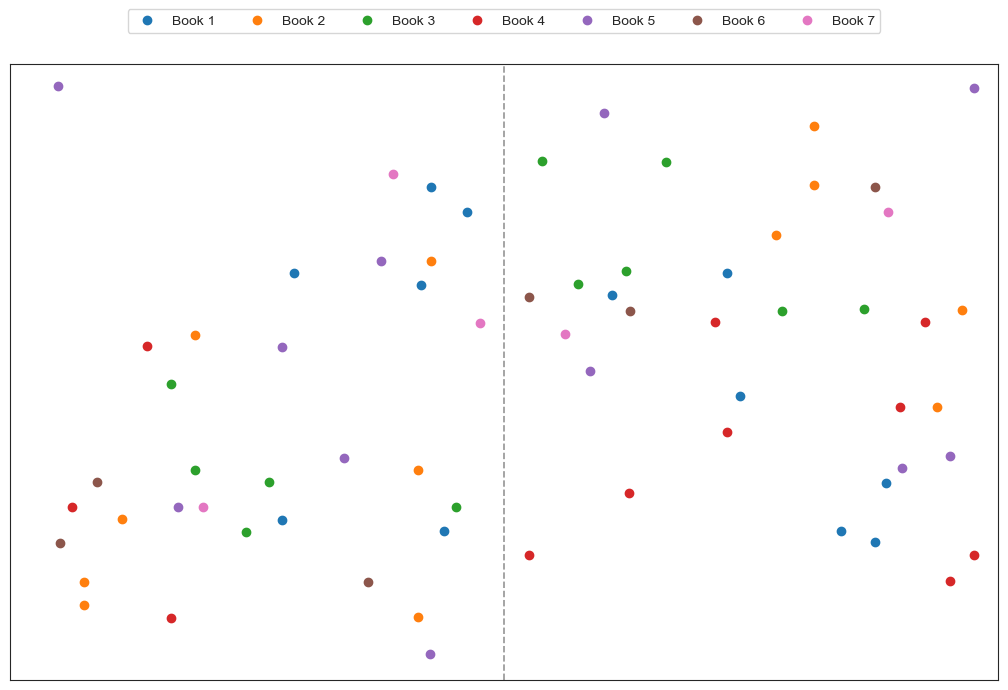

In [3]:
plt.figure(figsize=(12.75, 8))
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)

for book, group in wheres_waldo_locations.groupby("Book"):
    plt.plot(group.X, group.Y, "o", label="Book %d" % (book))

plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper center", ncol=7, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.1))
;

C:\Users\Sudheer\AppData\Local\Temp\ipykernel_3432\2035856616.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data=wheres_waldo_locations, x='X', shade=True, cmap="Blues")


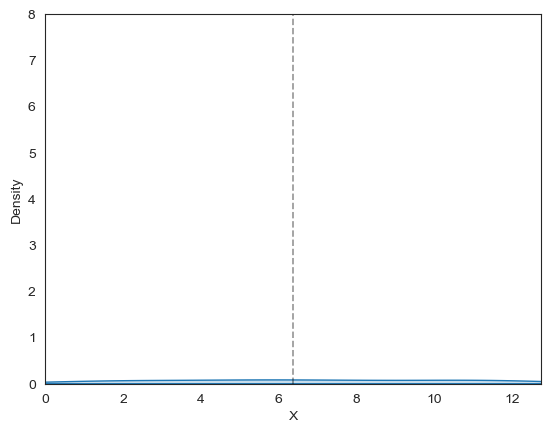

''

In [8]:
sb.kdeplot(data=wheres_waldo_locations, x='X', shade=True, cmap="Blues")
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)
plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.show()
;

In [9]:
waldo_location_map = {}

for i, record in wheres_waldo_locations.iterrows():
    key = "B%dP%d" % (record.Book, record.Page)
    waldo_location_map[key] = (record.X, record.Y)

In [10]:
def calculate_distance(x1, y1, x2, y2):
    """
        Returns the Euclidean distance between points (x1, y1) and (x2, y2)
    """
    return math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )

def compute_fitness(solution):
    """
        Computes the distance that the Waldo-seeking solution covers.
        
        Lower distance is better, so the GA should try to minimize this function.
    """
    solution_fitness = 0.0
    
    for index in range(1, len(solution)):
        w1 = solution[index]
        w2 = solution[index - 1]
        solution_fitness += calculate_distance(waldo_location_map[w1][0], waldo_location_map[w1][1],
                                               waldo_location_map[w2][0], waldo_location_map[w2][1])
        
    return solution_fitness

def generate_random_agent():
    """
        Creates a random Waldo-seeking path.
    """
    new_random_agent = waldo_location_map.keys()
    random.shuffle(new_random_agent)
    return tuple(new_random_agent)

def mutate_agent(agent_genome, max_mutations=3):
    """
        Applies 1 - `max_mutations` point mutations to the given Waldo-seeking path.
        
        A point mutation swaps the order of two locations in the Waldo-seeking path.
    """
    agent_genome = list(agent_genome)
    num_mutations = random.randint(1, max_mutations)
    
    for mutation in range(num_mutations):
        swap_index1 = random.randint(0, len(agent_genome) - 1)
        swap_index2 = swap_index1

        while swap_index1 == swap_index2:
            swap_index2 = random.randint(0, len(agent_genome) - 1)

        agent_genome[swap_index1], agent_genome[swap_index2] = agent_genome[swap_index2], agent_genome[swap_index1]
            
    return tuple(agent_genome)

def shuffle_mutation(agent_genome):
    """
        Applies a single shuffle mutation to the given Waldo-seeking path.
        
        A shuffle mutation takes a random sub-section of the path and moves it to
        another location in the path.
    """
    agent_genome = list(agent_genome)
    
    start_index = random.randint(0, len(agent_genome) - 1)
    length = random.randint(2, 20)
    
    genome_subset = agent_genome[start_index:start_index + length]
    agent_genome = agent_genome[:start_index] + agent_genome[start_index + length:]
    
    insert_index = random.randint(0, len(agent_genome) + len(genome_subset) - 1)
    agent_genome = agent_genome[:insert_index] + genome_subset + agent_genome[insert_index:]
    
    return tuple(agent_genome)

def generate_random_population(pop_size):
    """
        Generates a list with `pop_size` number of random Waldo-seeking paths.
    """
    random_population = []
    for agent in range(pop_size):
        random_population.append(generate_random_agent())
    return random_population

def plot_trajectory(agent_genome):
    """
        Create a visualization of the given Waldo-seeking path.
    """
    agent_xs = []
    agent_ys = []
    agent_fitness = compute_fitness(agent_genome)

    for waldo_loc in agent_genome:
        agent_xs.append(waldo_location_map[waldo_loc][0])
        agent_ys.append(waldo_location_map[waldo_loc][1])

    plt.figure()
    plt.title("Fitness: %f" % (agent_fitness))
    plt.plot(agent_xs[:18], agent_ys[:18], "-o", markersize=7)
    plt.plot(agent_xs[17:35], agent_ys[17:35], "-o", markersize=7)
    plt.plot(agent_xs[34:52], agent_ys[34:52], "-o", markersize=7)
    plt.plot(agent_xs[51:], agent_ys[51:], "-o", markersize=7)
    plt.plot(agent_xs[0], agent_ys[0], "^", color="#1f77b4", markersize=15)
    plt.plot(agent_xs[-1], agent_ys[-1], "v", color="#d62728", markersize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def run_genetic_algorithm(generations=10000, population_size=100):
    """
        The core of the Genetic Algorithm.
        
        `generations` and `population_size` must be a multiple of 10.
    """
    
    population_subset_size = int(population_size / 10.)
    generations_10pct = int(generations / 10.)
    
    # Create a random population of `population_size` number of solutions.
    population = generate_random_population(population_size)

    # For `generations` number of repetitions...
    for generation in range(int(generations)):
        
        # Compute the fitness of the entire current population
        population_fitness = {}

        for agent_genome in population:
            if agent_genome in population_fitness:
                continue

            population_fitness[agent_genome] = compute_fitness(agent_genome)

        # Take the top 10% shortest paths and produce offspring from each of them
        new_population = []
        for rank, agent_genome in enumerate(sorted(population_fitness,
                                                   key=population_fitness.get)[:population_subset_size]):

            if (generation % generations_10pct == 0 or generation == (generations - 1)) and rank == 0:
                print("Generation %d best: %f" % (generation, population_fitness[agent_genome]))
                print(agent_genome)
                plot_trajectory(agent_genome)

            # Create 1 exact copy of each top path
            new_population.append(agent_genome)

            # Create 4 offspring with 1-3 mutations
            for offspring in range(4):
                new_population.append(mutate_agent(agent_genome, 3))
                
            # Create 5 offspring with a single shuffle mutation
            for offspring in range(5):
                new_population.append(shuffle_mutation(agent_genome))

        # Replace the old population with the new population of offspring
        for i in range(len(population))[::-1]:
            del population[i]

        population = new_population

In [12]:
import random

def generate_random_agent():
    """
    Creates a random Waldo-seeking path.
    """
    new_random_agent = list(waldo_location_map.keys())
    random.shuffle(new_random_agent)
    return tuple(new_random_agent)

Generation 0 best: 299.907329
('B4P11', 'B4P2', 'B3P11', 'B4P7', 'B1P12', 'B5P8', 'B6P5', 'B1P2', 'B3P6', 'B5P2', 'B1P8', 'B4P5', 'B2P5', 'B4P3', 'B5P3', 'B3P3', 'B5P9', 'B3P7', 'B3P8', 'B1P6', 'B3P1', 'B6P11', 'B2P10', 'B3P2', 'B3P10', 'B1P11', 'B1P4', 'B4P4', 'B2P2', 'B2P7', 'B4P9', 'B7P6', 'B3P9', 'B2P4', 'B2P6', 'B3P5', 'B6P1', 'B2P8', 'B7P1', 'B4P1', 'B6P8', 'B1P7', 'B7P3', 'B5P1', 'B1P3', 'B2P9', 'B6P2', 'B5P5', 'B3P4', 'B1P5', 'B2P1', 'B7P2', 'B6P12', 'B7P7', 'B1P1', 'B1P9', 'B2P3', 'B4P10', 'B5P11', 'B5P6', 'B5P10', 'B2P11', 'B4P6', 'B2P12', 'B4P8', 'B5P7', 'B5P4', 'B1P10')


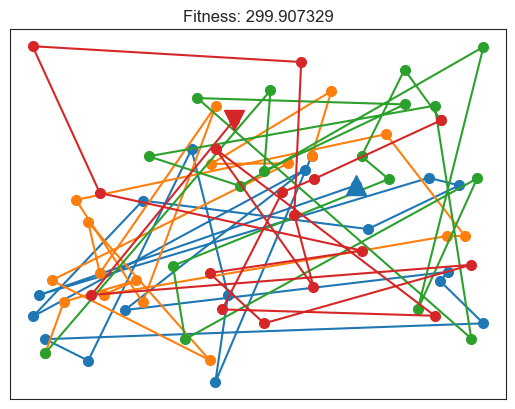

Generation 1000 best: 68.885260
('B5P10', 'B7P1', 'B2P3', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B5P4', 'B7P6', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B1P4', 'B3P6', 'B3P9', 'B5P5', 'B1P1', 'B3P3', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B1P10', 'B1P11', 'B3P5', 'B5P6', 'B3P8', 'B2P8', 'B6P8', 'B7P2', 'B5P1', 'B2P1', 'B2P2', 'B1P5', 'B3P7', 'B6P12', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B4P11', 'B3P4', 'B4P7', 'B2P9', 'B3P11', 'B4P9', 'B2P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B5P7', 'B4P5', 'B4P1')


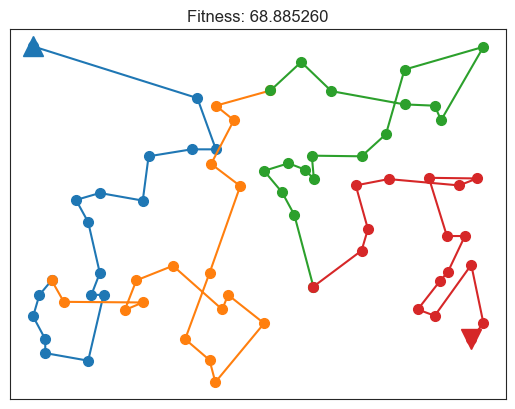

Generation 2000 best: 65.126676
('B5P10', 'B7P1', 'B1P11', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B5P4', 'B7P6', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B3P6', 'B3P9', 'B1P4', 'B5P5', 'B3P3', 'B1P1', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B2P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P8', 'B6P8', 'B7P2', 'B5P1', 'B2P1', 'B2P2', 'B1P5', 'B3P7', 'B6P12', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B4P11', 'B3P4', 'B3P11', 'B2P9', 'B4P7', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


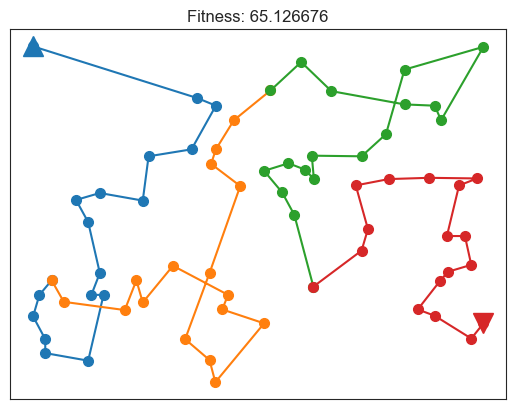

Generation 3000 best: 64.248366
('B5P10', 'B7P1', 'B1P11', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B3P6', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B3P9', 'B1P4', 'B5P5', 'B3P3', 'B1P1', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B2P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B3P7', 'B6P12', 'B1P2', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B4P11', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


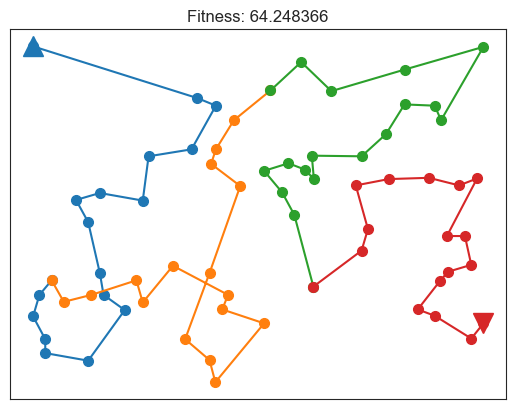

Generation 4000 best: 63.777512
('B5P10', 'B7P1', 'B1P11', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B3P3', 'B1P1', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B2P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B4P11', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


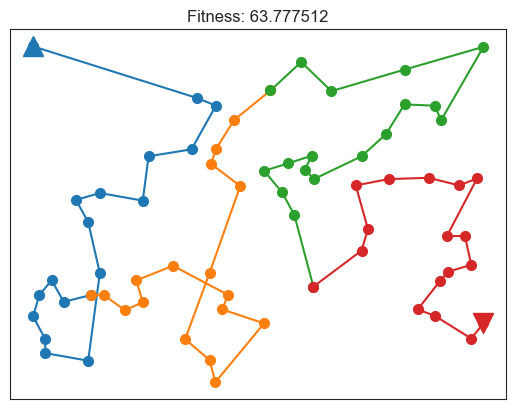

Generation 5000 best: 63.655036
('B5P10', 'B7P1', 'B1P11', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B3P3', 'B1P1', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B2P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B2P9', 'B4P7', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


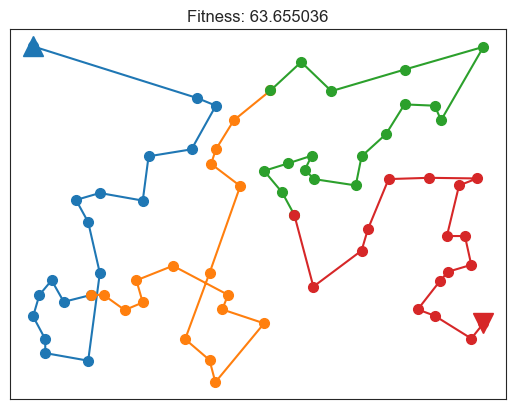

Generation 6000 best: 63.535330
('B5P10', 'B7P1', 'B1P11', 'B5P3', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B3P3', 'B1P1', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B2P12', 'B7P3', 'B1P6', 'B2P3', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


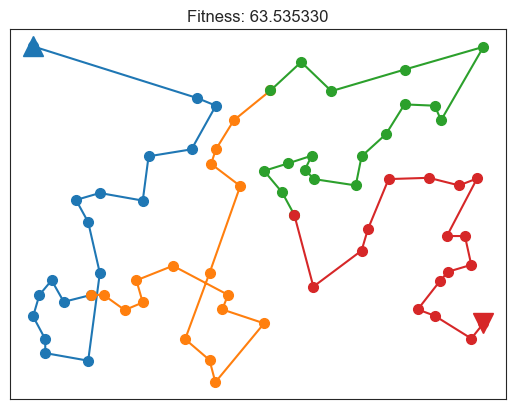

Generation 7000 best: 62.191805
('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


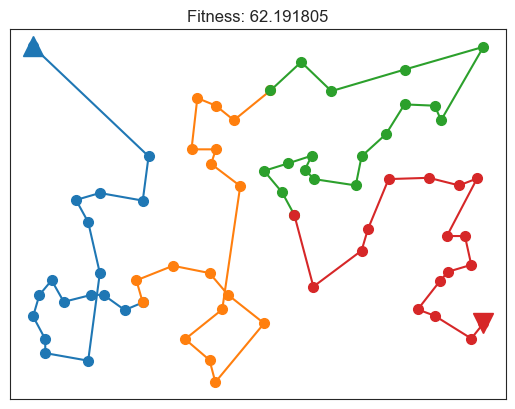

Generation 8000 best: 62.191805
('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B4P8', 'B5P9', 'B2P10', 'B6P2', 'B1P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B7P2', 'B6P8', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


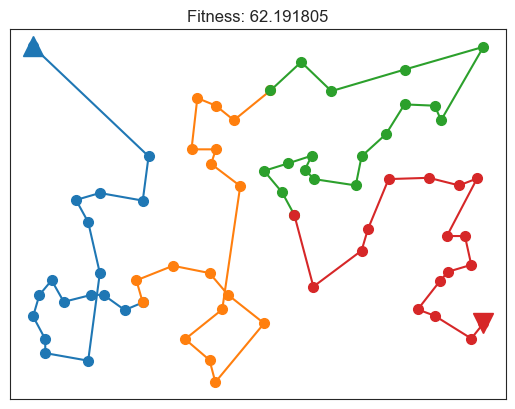

Generation 9000 best: 61.948847
('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B2P9', 'B4P7', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


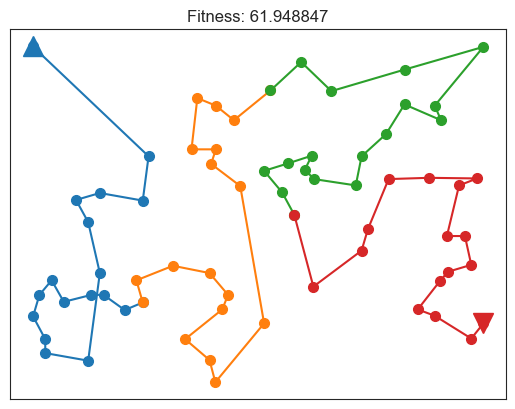

Generation 9999 best: 61.829141
('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B6P11', 'B2P4', 'B5P4', 'B7P6', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B2P1', 'B5P1', 'B6P8', 'B7P2', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P7', 'B5P11', 'B4P10', 'B4P6', 'B1P12', 'B3P4', 'B3P11', 'B4P7', 'B2P9', 'B4P9', 'B2P7', 'B5P7', 'B5P2', 'B1P8', 'B1P3', 'B1P9', 'B4P1', 'B4P5')


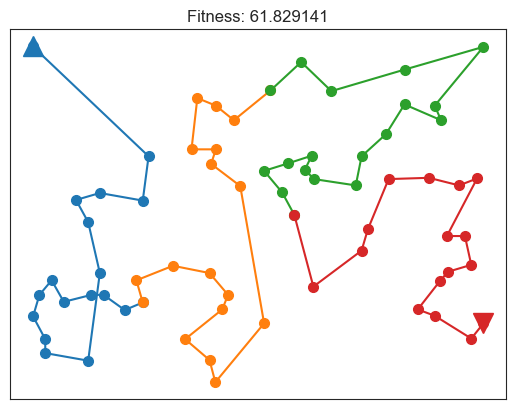

In [13]:
run_genetic_algorithm(generations=10000, population_size=100)